<a href="https://colab.research.google.com/github/akshaya-nagarajan/DeepLearningProjects/blob/master/Assignment_2/DLAssignment2_LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import the libraries

In [0]:
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split

from keras.layers.core import Dense, Activation, Dropout
from keras.utils import np_utils
from keras.models import Sequential, model_from_json
from keras.optimizers import RMSprop
from keras.optimizers import SGD
from keras.regularizers import L1L2

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


## Seaborn dataset direct download for Diamond Dataset

In [0]:
diamond_dataset = sns.load_dataset("diamonds")

## Displaying the top 5 rows in the dataset

In [0]:
diamond_dataset.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## Printing the minimum, maximum and mean in the price values. This is done to make a equal number of split for 0 and 1 binary classes.

In [0]:
print(diamond_dataset.price.min())
print(diamond_dataset.price.max())
print(diamond_dataset.price.mean())

326
18823
3932.799721913237


## Creating binary Labels to perform Logistic Regression

In [0]:
def priceLabel(value):
  if value < 9000:
    return 0
  else:
    return 1

## Adding the binary values as labels Column to the dataset

In [0]:
diamond_dataset['priceLabel'] = diamond_dataset['price'].apply(priceLabel)

## Dropping the unnecessary Columns

In [0]:
diamond_dataset.drop('price', axis=1, inplace=True)

## Changing all the categorical columns to numerical columns

In [0]:
diamond_dataset['cut'] = diamond_dataset['cut'].map({'Ideal':1,'Good':2,'Very Good':3,'Fair':4,'Premium':5})
diamond_dataset['color'] = diamond_dataset['color'].map({'E':1,'D':2,'F':3,'G':4,'H':5,'I':6,'J':7})
diamond_dataset['clarity'] = diamond_dataset['clarity'].map({'VVS1':1,'IF':2,'VVS2':3,'VS1':4,'I1':5,'VS2':6,'SI1':7,'SI2':8})

## Considering all the columns except the last one for X and Considering only the last column as target Y

In [0]:
X = diamond_dataset.values[:, diamond_dataset.columns != 'priceLabel']
y = diamond_dataset.values[:, 9]

In [0]:
diamond_dataset.shape

(53940, 10)

In [0]:
diamond_dataset.head(5)

,carat,cut,color,clarity,depth,table,x,y,z,priceLabel
0,0.23,1,1,8,61.5,55.0,3.95,3.98,2.43,0
1,0.21,5,1,7,59.8,61.0,3.89,3.84,2.31,0
2,0.23,2,1,4,56.9,65.0,4.05,4.07,2.31,0
3,0.29,5,6,6,62.4,58.0,4.20,4.23,2.63,0
4,0.31,2,7,8,63.3,58.0,4.34,4.35,2.75,0


## Printing the shapes

In [0]:
X.shape

(53940, 9)

In [0]:
X[0, :]

array([ 0.23,  1.  ,  1.  ,  8.  , 61.5 , 55.  ,  3.95,  3.98,  2.43])

In [0]:
y.shape

(53940,)

## Making a Train-Test Split

In [0]:
train_X, test_X, train_y, test_y = train_test_split(X, y, train_size=0.8, random_state=42)

## Creating a sequential model with multiple Dense Relu, Sigmoid layers and Dropouts

In [0]:
opt = SGD(lr=0.01)

model = Sequential()

model.add(Dense(256, activation='relu', input_shape=(9,)))
model.add(Dense(256, activation='relu'))
# model.add(Dense(256, activation='relu', kernel_regularizer=L1L2(l1=0.0, l2=0.1)))
model.add(Dropout(0.25))
model.add(Dense(1, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1, activation='sigmoid'))

model.summary()

model.compile(loss='binary_crossentropy', optimizer='RMSProp', metrics=['binary_accuracy'])
# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

history = model.fit(train_X, train_y, batch_size=256, epochs=50, verbose=1)

test = model.evaluate(test_X, test_y, verbose=1)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               2560      
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 257       
_________________________________________________________________
dropout_2 (Dropout)          (None, 1)                 0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 2         
Total params: 68,611
Trainable params: 68,611
Non-trainable params: 0
__________________________________________________

In [0]:
test

[0.3580605084912884, 0.8844085931777954]

## Test Accuracy

In [0]:
accuracy = test[1] * 100
print('Accuracy of Logistic Regression', accuracy)

Accuracy of Logistic Regression 88.44085931777954


## Visualization

In [0]:
from matplotlib import pyplot as plt

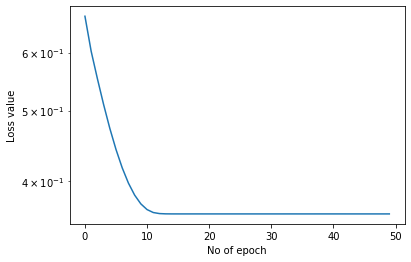

In [0]:
plt.plot(history.history['loss'], label='Loss')
plt.ylabel('Loss value')
plt.yscale('log')
plt.xlabel('No of epoch')
plt.show()

## Keras Tuner

In [0]:
!pip install -U keras-tuner

     |████████████████████████████████| 61kB 1.8MB/s 
  Created wheel for keras-tuner: filename=keras_tuner-1.0.1-cp36-none-any.whl size=73200 sha256=77c1293767489018ec68002fbacac158dcee5520795f46697e12ec2df8f3bf4a
  Stored in directory: /root/.cache/pip/wheels/b9/cc/62/52716b70dd90f3db12519233c3a93a5360bc672da1a10ded43
  Created wheel for terminaltables: filename=terminaltables-3.1.0-cp36-none-any.whl size=15356 sha256=f73ed3094eae5a4e8d85f64a1268f240d252ea094b16de141b990d5dfa5a0fee
  Stored in directory: /root/.cache/pip/wheels/30/6b/50/6c75775b681fb36cdfac7f19799888ef9d8813aff9e379663e
Successfully built keras-tuner terminaltables


## Creating a model similar to the above model but sending the parameters for the models as an hyperparameter argument

In [0]:
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch

def build_model(hp):
    model = keras.Sequential()
    model.add(layers.Dense(units=hp.Int('units', min_value=32, max_value=512, step=32), activation='relu', input_shape=(9,)))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer=keras.optimizers.RMSprop(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])), loss='binary_crossentropy', metrics=['accuracy'])
    return model

## Using Keras Tuner RandomSearch to get the best model. Before Tuning the model accuracy was 88%. After tuning and testing with hyperparameters, the possible accuracy that can be achieved is 96%

In [0]:
tuner = RandomSearch(build_model, objective='val_accuracy', max_trials=5, executions_per_trial=3,  project_name='kerastuning-test1')

## Keras Tuner Summary

In [0]:
tuner.search_space_summary()

## Keras Tuner Search - Running 5 searches (Max Trail param) with 5 Epochs each

In [0]:
tuner.search(train_X, train_y, epochs=5, validation_split=0.33)

Epoch 1/5
904/904 [==============================] - 2s 2ms/step - loss: 0.2649 - accuracy: 0.8909 - val_loss: 0.1905 - val_accuracy: 0.9336
Epoch 2/5
904/904 [==============================] - 2s 2ms/step - loss: 0.1593 - accuracy: 0.9337 - val_loss: 0.1363 - val_accuracy: 0.9327
Epoch 3/5
904/904 [==============================] - 2s 2ms/step - loss: 0.1226 - accuracy: 0.9551 - val_loss: 0.1083 - val_accuracy: 0.9655
Epoch 4/5
904/904 [==============================] - 2s 2ms/step - loss: 0.1056 - accuracy: 0.9625 - val_loss: 0.0988 - val_accuracy: 0.9709
Epoch 5/5
904/904 [==============================] - 2s 2ms/step - loss: 0.0965 - accuracy: 0.9666 - val_loss: 0.0987 - val_accuracy: 0.9509
Epoch 1/5
904/904 [==============================] - 2s 2ms/step - loss: 0.2945 - accuracy: 0.8776 - val_loss: 0.1954 - val_accuracy: 0.9109
Epoch 2/5
904/904 [==============================] - 2s 2ms/step - loss: 0.1677 - accuracy: 0.9280 - val_loss: 0.1410 - val_accuracy: 0.9528
Epoch 3/5
904

Epoch 1/5
904/904 [==============================] - 2s 2ms/step - loss: 0.2144 - accuracy: 0.9144 - val_loss: 0.0818 - val_accuracy: 0.9705
Epoch 2/5
904/904 [==============================] - 2s 2ms/step - loss: 0.1242 - accuracy: 0.9504 - val_loss: 0.0911 - val_accuracy: 0.9558
Epoch 3/5
904/904 [==============================] - 2s 2ms/step - loss: 0.1075 - accuracy: 0.9567 - val_loss: 0.1223 - val_accuracy: 0.9441
Epoch 4/5
904/904 [==============================] - 2s 2ms/step - loss: 0.0984 - accuracy: 0.9623 - val_loss: 0.4256 - val_accuracy: 0.8959
Epoch 5/5
904/904 [==============================] - 2s 2ms/step - loss: 0.0923 - accuracy: 0.9631 - val_loss: 0.0652 - val_accuracy: 0.9739
Epoch 1/5
904/904 [==============================] - 2s 2ms/step - loss: 0.2128 - accuracy: 0.9167 - val_loss: 0.1040 - val_accuracy: 0.9464
Epoch 2/5
904/904 [==============================] - 2s 2ms/step - loss: 0.1280 - accuracy: 0.9495 - val_loss: 0.2258 - val_accuracy: 0.9144
Epoch 3/5
904

Epoch 1/5
904/904 [==============================] - 2s 2ms/step - loss: 0.6087 - accuracy: 0.8319 - val_loss: 0.2195 - val_accuracy: 0.8929
Epoch 2/5
904/904 [==============================] - 2s 2ms/step - loss: 0.1869 - accuracy: 0.9170 - val_loss: 0.1619 - val_accuracy: 0.9502
Epoch 3/5
904/904 [==============================] - 2s 2ms/step - loss: 0.1428 - accuracy: 0.9428 - val_loss: 0.1256 - val_accuracy: 0.9466
Epoch 4/5
904/904 [==============================] - 2s 2ms/step - loss: 0.1208 - accuracy: 0.9560 - val_loss: 0.1116 - val_accuracy: 0.9487
Epoch 5/5
904/904 [==============================] - 2s 2ms/step - loss: 0.1080 - accuracy: 0.9625 - val_loss: 0.0991 - val_accuracy: 0.9667
Epoch 1/5
904/904 [==============================] - 2s 2ms/step - loss: 0.2507 - accuracy: 0.8960 - val_loss: 0.1921 - val_accuracy: 0.9076
Epoch 2/5
904/904 [==============================] - 2s 2ms/step - loss: 0.1658 - accuracy: 0.9306 - val_loss: 0.1406 - val_accuracy: 0.9506
Epoch 3/5
904

Epoch 1/5
904/904 [==============================] - 2s 2ms/step - loss: 0.1883 - accuracy: 0.9258 - val_loss: 0.0926 - val_accuracy: 0.9717
Epoch 2/5
904/904 [==============================] - 2s 2ms/step - loss: 0.1179 - accuracy: 0.9509 - val_loss: 0.1934 - val_accuracy: 0.9202
Epoch 3/5
904/904 [==============================] - 2s 2ms/step - loss: 0.1057 - accuracy: 0.9589 - val_loss: 0.1556 - val_accuracy: 0.9343
Epoch 4/5
904/904 [==============================] - 2s 2ms/step - loss: 0.0991 - accuracy: 0.9609 - val_loss: 0.0782 - val_accuracy: 0.9657
Epoch 5/5
904/904 [==============================] - 2s 2ms/step - loss: 0.0953 - accuracy: 0.9636 - val_loss: 0.3039 - val_accuracy: 0.8851
Epoch 1/5
904/904 [==============================] - 2s 2ms/step - loss: 0.2023 - accuracy: 0.9189 - val_loss: 0.1066 - val_accuracy: 0.9452
Epoch 2/5
904/904 [==============================] - 2s 2ms/step - loss: 0.1191 - accuracy: 0.9524 - val_loss: 0.2182 - val_accuracy: 0.9079
Epoch 3/5
904

Epoch 1/5
904/904 [==============================] - 2s 2ms/step - loss: 0.3126 - accuracy: 0.9111 - val_loss: 0.1153 - val_accuracy: 0.9492
Epoch 2/5
904/904 [==============================] - 2s 2ms/step - loss: 0.1233 - accuracy: 0.9486 - val_loss: 0.1062 - val_accuracy: 0.9527
Epoch 3/5
904/904 [==============================] - 2s 2ms/step - loss: 0.1097 - accuracy: 0.9557 - val_loss: 0.0662 - val_accuracy: 0.9727
Epoch 4/5
904/904 [==============================] - 2s 3ms/step - loss: 0.0992 - accuracy: 0.9584 - val_loss: 0.0702 - val_accuracy: 0.9709
Epoch 5/5
904/904 [==============================] - 2s 2ms/step - loss: 0.0932 - accuracy: 0.9622 - val_loss: 0.0770 - val_accuracy: 0.9655
Epoch 1/5
904/904 [==============================] - 2s 2ms/step - loss: 0.2799 - accuracy: 0.9122 - val_loss: 0.1778 - val_accuracy: 0.9216
Epoch 2/5
904/904 [==============================] - 2s 2ms/step - loss: 0.1230 - accuracy: 0.9495 - val_loss: 0.0710 - val_accuracy: 0.9722
Epoch 3/5
904

INFO:tensorflow:Oracle triggered exit


In [0]:
tuner.results_summary()

## Printing the Best Model

In [0]:
best_model = tuner.get_best_models(num_models=1)[0]
best_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 224)               2240      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 225       
Total params: 2,465
Trainable params: 2,465
Non-trainable params: 0
_________________________________________________________________
